In [1]:
# ================================================================================
# Splitting training and test sets
# ================================================================================

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

data=pd.read_csv('WAGE2_2025_abridged.csv')

state=1108224 # replace this number with the sum of the student IDs for the members of your group

train = data.sample(frac=0.8, random_state=state)
test = data[data.index.isin(train.index)==False].copy() # Only for prediction

train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [3]:
train.head()

wage  hours   IQ  KWW  educ  exper  tenure  age  married  black  south  \
0   900     40   78   21    12     16       5   33        1      1      0   
1   962     50  124   43    16      7      14   34        1      0      0   
2  1318     35  118   47    16     16      17   37        1      0      0   
3   962     40  120   33    12     18      19   36        1      0      0   
4   577     40  106   43    17     11       7   33        0      1      1   

   urban  sibs  brthord  meduc  feduc     lwage  
0      1     4      1.0    7.0    6.0  6.802395  
1      1     2      2.0    9.0   11.0  6.869014  
2      0     1      1.0    8.0   12.0  7.183871  
3      1     3      NaN    8.0    8.0  6.869014  
4      1     3      2.0   13.0   16.0  6.357842

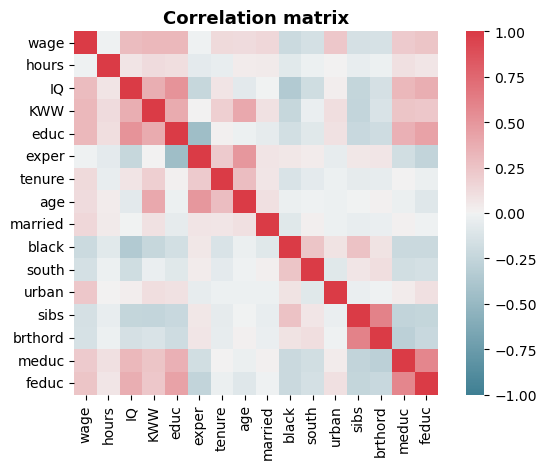

In [3]:
fig, ax = plt.subplots()
variables=['wage','hours','IQ', 'KWW', 'educ', 'exper', 'tenure','age','married','black','south','urban','sibs','brthord','meduc','feduc']
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[variables].corr(), vmax=1, vmin=-1, center=0, square=True, ax=ax, cmap=cmap)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show()

The correlation heat-map illustrates some strong positive and negative correlations between variables in this dataset. Positive correlations with the response variable wage exist for IQ, KWW, educ, urban. Years of experience, however, barely correlated with the variable wage. 



In [5]:
train[variables].corr().round(2)

wage  hours    IQ   KWW  educ  exper  tenure   age  married  black  \
wage     1.00  -0.01  0.29  0.32  0.31  -0.01    0.13  0.12     0.15  -0.21   
hours   -0.01   1.00  0.08  0.12  0.10  -0.06   -0.04  0.03     0.04  -0.08   
IQ       0.29   0.08  1.00  0.37  0.52  -0.24    0.07 -0.07    -0.01  -0.35   
KWW      0.32   0.12  0.37  1.00  0.38   0.01    0.19  0.40     0.09  -0.24   
educ     0.31   0.10  0.52  0.38  1.00  -0.46    0.01 -0.02    -0.06  -0.17   
exper   -0.01  -0.06 -0.24  0.01 -0.46   1.00    0.21  0.49     0.08   0.06   
tenure   0.13  -0.04  0.07  0.19  0.01   0.21    1.00  0.28     0.07  -0.13   
age      0.12   0.03 -0.07  0.40 -0.02   0.49    0.28  1.00     0.10  -0.03   
married  0.15   0.04 -0.01  0.09 -0.06   0.08    0.07  0.10     1.00  -0.09   
black   -0.21  -0.08 -0.35 -0.24 -0.17   0.06   -0.13 -0.03    -0.09   1.00   
south   -0.16  -0.02 -0.18 -0.03 -0.09   0.03   -0.07 -0.01     0.02   0.24   
urban    0.23   0.00  0.03  0.11  0.09  -0.05   -0.02 -0.02    -0.02   0.08   
sibs    -0.15  -0.04 -0.24 -0.25 -0.22   0.06   -0.06 -0.00    -0.04   0.26   
brthord -0.15  -0.02 -0.15 -0.13 -0.19   0.06   -0.05  0.01    -0.03   0.08   
meduc    0.22   0.10  0.31  0.25  0.36  -0.18    0.00 -0.03     0.01  -0.22   
feduc    0.25   0.07  0.37  0.23  0.43  -0.26   -0.03 -0.10    -0.01  -0.21   

         south  urban  sibs  brthord  meduc  feduc  
wage     -0.16   0.23 -0.15    -0.15   0.22   0.25  
hours    -0.02   0.00 -0.04    -0.02   0.10   0.07  
IQ       -0.18   0.03 -0.24    -0.15   0.31   0.37  
KWW      -0.03   0.11 -0.25    -0.13   0.25   0.23  
educ     -0.09   0.09 -0.22    -0.19   0.36   0.43  
exper     0.03  -0.05  0.06     0.06  -0.18  -0.26  
tenure   -0.07  -0.02 -0.06    -0.05   0.00  -0.03  
age      -0.01  -0.02 -0.00     0.01  -0.03  -0.10  
married   0.02  -0.02 -0.04    -0.03   0.01  -0.01  
black     0.24   0.08  0.26     0.08  -0.22  -0.21  
south     1.00  -0.09  0.07     0.10  -0.18  -0.16  
urban    -0.09   1.00 -0.03    -0.01   0.04   0.10  
sibs      0.07  -0.03  1.00     0.61  -0.27  -0.25  
brthord   0.10  -0.01  0.61     1.00  -0.29  -0.23  
meduc    -0.18   0.04 -0.27    -0.29   1.00   0.59  
feduc    -0.16   0.10 -0.25    -0.23   0.59   1.00

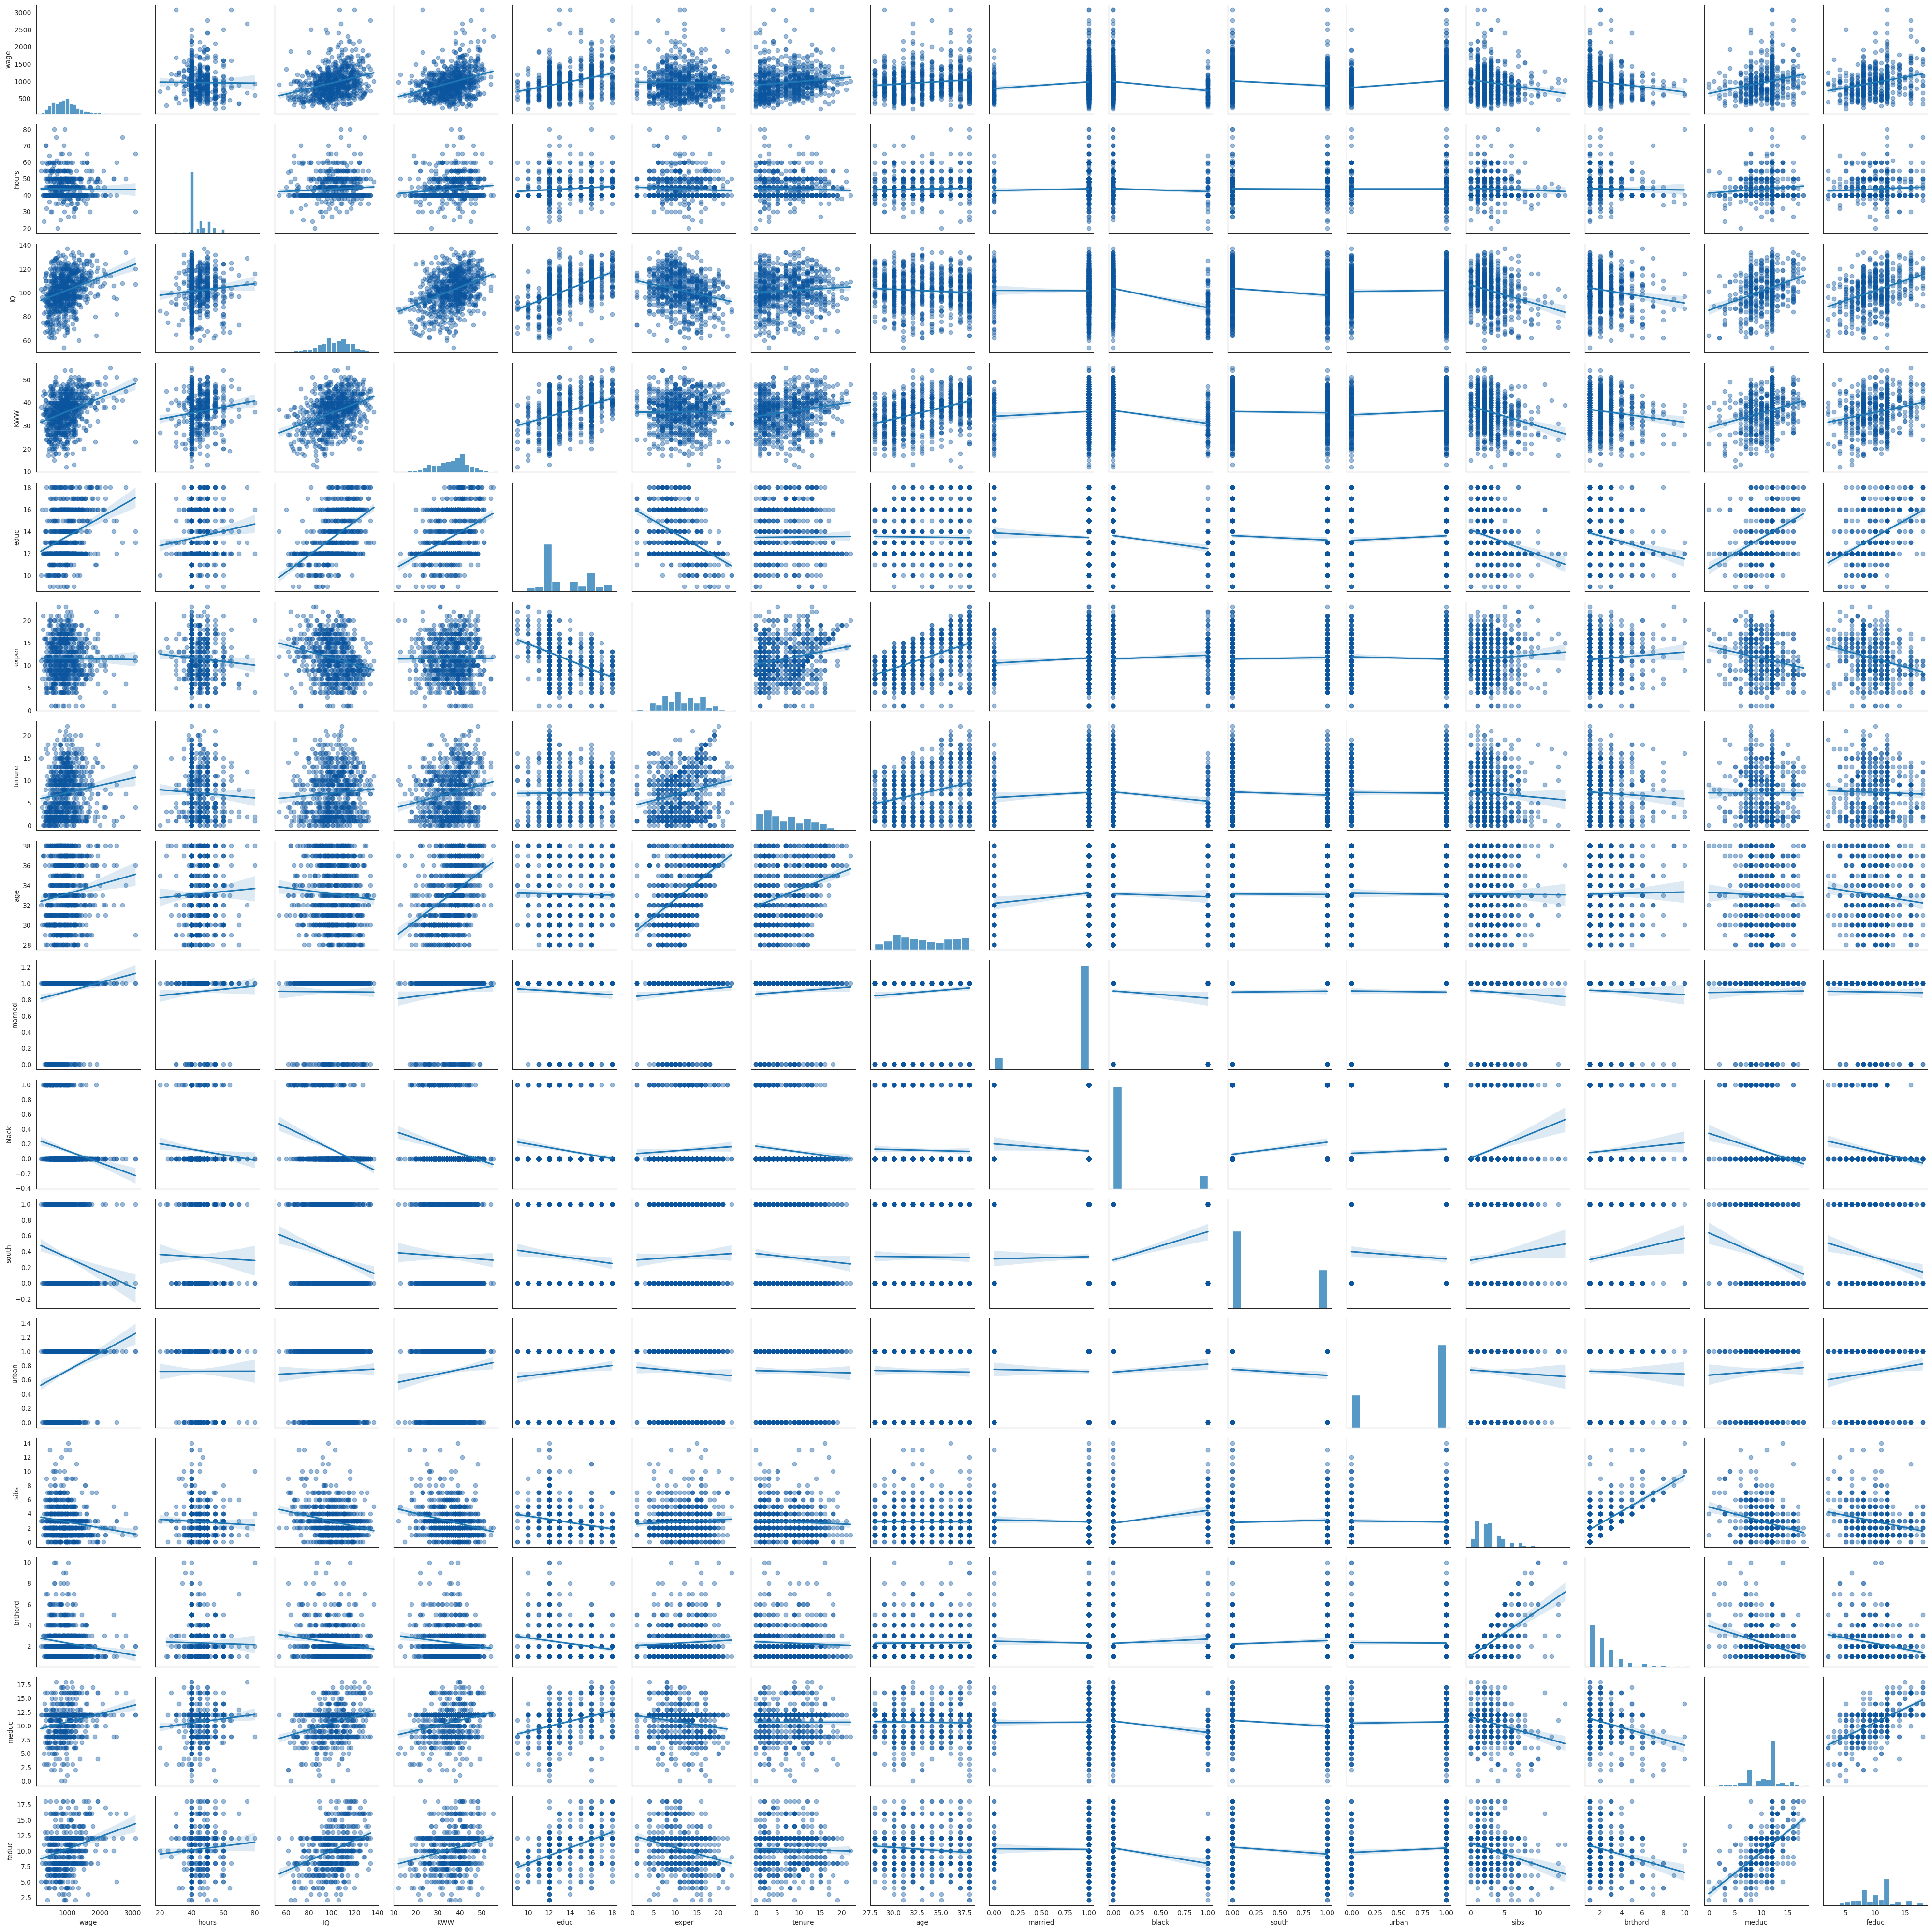

In [6]:
with sns.axes_style('white'):
    g=sns.pairplot(train[variables], kind='reg',
                   plot_kws={'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})
plt.tight_layout()
g.fig.savefig('DM-pairplot.png', dpi=300)
plt.show()

Clear positive relationships exist between wage and variables such as IQ, KWW, and education. These relationships appear approximately linear and relatively strong, suggesting these variables may be important predictors in modeling wage. For example, as education increases, average wages also tend to rise, which aligns with economic expectations.

However, some relationships are more complex. The relationship between wage and experience (exper) is initially positive but flattens or even dips slightly at higher levels, indicating a potential non-linear trend. This is also reflected in the plot with tenure and age, where the pattern is less clearly linear and may warrant modeling with squared or interaction terms.

Several categorical variables such as married, black, south, and urban show distinct groupings in wage but with overlapping distributions, implying they may influence wage through interaction effects or differ in variance, rather than in pure mean differences.

Regarding the parental education variables (meduc and feduc), the relationships with wage are present but weak. This suggests background factors may have some influence, though they are not as predictive as an individual's own education or ability (as proxied by IQ and KWW).

In terms of relationships between the predictors, no extremely strong correlations are observed that would suggest problematic multicollinearity. While there are some moderate associations (e.g., between educ and IQ, or tenure and age), none are strong enough to cause immediate concern for variance inflation in the regression model. At this stage, multicollinearity does not appear to be a major issue.

In [8]:
train[['wage','educ','exper']].describe().round(2)

wage    educ   exper
count   733.00  733.00  733.00
mean    963.40   13.50   11.54
std     407.09    2.19    4.44
min     200.00    9.00    1.00
25%     670.00   12.00    8.00
50%     921.00   12.00   11.00
75%    1161.00   16.00   15.00
max    3078.00   18.00   23.00

In [9]:
model = smf.ols(formula='wage ~ hours +  IQ + KWW + educ + exper + tenure + age + married + black + south + urban + sibs + brthord + meduc + feduc', data=train)
reg = model.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     12.91
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           1.29e-27
Time:                        19:52:47   Log-Likelihood:                -3861.5
No. Observations:                 532   AIC:                             7755.
Df Residuals:                     516   BIC:                             7823.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -465.9901    252.045     -1.849      0.065    -961.150      29.170
hours         -4.7131      2.235     -2.108      0.035      -9.105      -0.321
IQ             2.2108      1.361      1.624      0.105      -0.464       4.885
KWW            7.5634      2.715      2.786      0.006       2.230      12.897
educ          38.3882     10.064      3.814      0.000      18.617      58.159
exper         11.6848      4.819      2.425      0.016       2.218      21.151
tenure        -0.1506      3.225     -0.047      0.963      -6.486       6.185
age            2.3324      6.786      0.344      0.731     -10.998      15.663
married      183.5434     53.607      3.424      0.001      78.229     288.857
black        -86.0046     64.428     -1.335      0.183    -212.578      40.569
south        -60.3617     34.422     -1.754      0.080    -127.987       7.264
urban        179.8824     34.493      5.215      0.000     112.118     247.647
sibs           3.9979      9.134      0.438      0.662     -13.946      21.942
brthord      -12.5573     13.173     -0.953      0.341     -38.436      13.321
meduc          5.2026      6.921      0.752      0.453      -8.395      18.800
feduc         11.3439      6.190      1.833      0.067      -0.817      23.505
==============================================================================
Omnibus:                      180.025   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              822.970
Skew:                           1.448   Prob(JB):                    1.97e-179
Kurtosis:                       8.361   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The effects of each variable can be summarized as:

Keeping all other variables constant, an increase of 1 average weekly hour is associated with an average decrease in the wage of 4.71 dollars.

Keeping all other variables constant, an increase of 1 IQ score is associated with an average increase in the wage of 2.21 dollars.

Keeping all other variables constant, an increase of 1 knowledge of world work score is associated with an average increase in the wage of 7.56 dollars.

Keeping all other variables constant, an increase of 1 year of education is associated with an average increase in the wage of 38.38 dollars.

Keeping all other variables constant, an increase of 1 year of experience is associated with an average increase in the wage of 11.68 dollars.

Keeping all other variables constant, an increase of 1 year with current employer is associated with an average decrease in the wage of 0.15 dollars.

Keeping all other variables constant, an increase of 1 age is associated with an average increase in the wage of 2.33 dollars.

Keeping all other variables constant, married people earns 183.54 dollars on average more than others. 

Keeping all other variables constant, black people earns 86 dollars on average less than others. 

Keeping all other variables constant, south people earns 60.36 dollars on average less than others. 

Keeping all other variables constant, urban people earns 179.88 dollars on average more than others. 

Keeping all other variables constant, an increase of 1 sibling is associated with an average increase in the wage of 4 dollars.

Keeping all other variables constant, an increase of 1 birth order is associated with an average decrease in the wage of 12.56 dollars.

Keeping all other variables constant, an increase of 1 year of mother's education is associated with an average increase in the wage of 5.2 dollars.

Keeping all other variables constant, an increase of 1 year of father's education is associated with an average increase in the wage of 11.34 dollars.


In [11]:
reg.mse_resid**0.5

348.9075215779976

In [12]:
model1 = smf.ols(formula='wage ~ educ + exper', data=train) 
reg1 = model1.fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     50.55
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           2.75e-21
Time:                        19:52:48   Log-Likelihood:                -5396.7
No. Observations:                 733   AIC:                         1.080e+04
Df Residuals:                     730   BIC:                         1.081e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -201.4463    123.348     -1.633      0.103    -443.605      40.712
educ          72.8844      7.251     10.051      0.000      58.648      87.120
exper         15.6788      3.582      4.377      0.000       8.646      22.712
==============================================================================
Omnibus:                      185.644   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              598.137
Skew:                           1.202   Prob(JB):                    1.31e-130
Kurtosis:                       6.716   Cond. No.                         157.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As in the full model, the variable educ is positively related to wage, after accounting for the effect of exper. Again, bedroom is positively related to wage, after accounting for the effect of educ. The effects of each variable can be summarized as:

Keeping years of work excperience constant, an increase of 1 year of education is associated with an average increase in the wage of 72.88 dollars.
Keeping years of education constant, an increase of 1 year of experience is associated with an average increase in the wage of 15.68 dollars.

It is also noticeable that these estimates, though of the same sign, are quite different to their respective etimates in the full model. This could be evidence of some omitted variable bias (OVB) in this reduced model, for both variables. We consider this in more detail in part (i).


In [14]:
resid1=reg1.resid
fit1=reg1.fittedvalues
reg1.mse_resid**0.5

382.0518756338798

In [15]:
train[['educ','exper']].corr()

educ     exper
educ   1.000000 -0.460066
exper -0.460066  1.000000

In [16]:
1/(1-0.460066**2)

1.2684893812795168

The full model has $R^2 = 0.273$, $R^2_{adj} = 0.252$ and SER = $348.91$ dollars.
The reduced model has $R^2 = 0.122$, $R^2_{adj} = 0.119$ and SER = $382.05$ dollars.

The full model captures about $26\%$ of the variation in wages, with a typical prediction error of about $\$349$. The reduced model captures about $12\%$ of the variation in wages, with a typical prediction error of about $\$382$. Clearly, both models are pretty strong fits to the data, but the full model is the strongest fit between the two, capturing about $14$ percentage point more variation in wages and reducing the prediction error by about $\$33$.   

The variance inflation can be measured by the $R^2$ in the regression of one regressor on the other. Both equal to $\frac{1}{1-r^2}$, where $r$ is the correlation between educ and exper, as calculated above, equal 1.27. This is not a large number -- the usual threshold for the presence of a multicollinearity problem is 5.


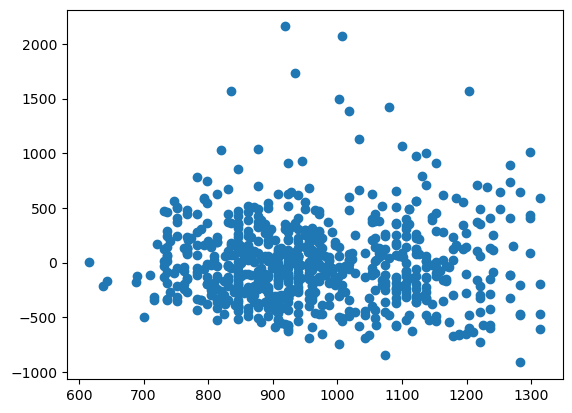

In [22]:
plt.scatter(fit1,resid1)
plt.show()

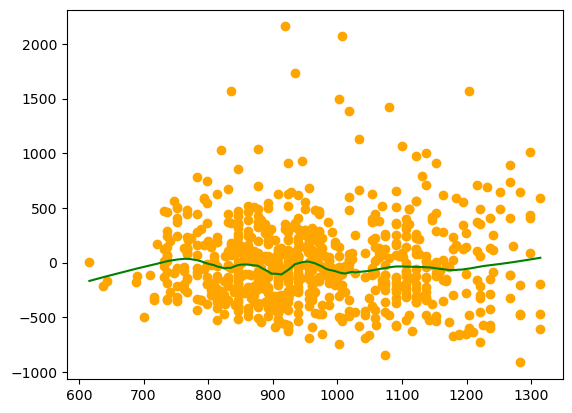

In [69]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
plt.scatter(fit1,resid1, color='orange')
z1 = lowess(resid1, fit1, frac=1./5)
plt.plot(z1[:,0],z1[:,1],'green')
plt.show()

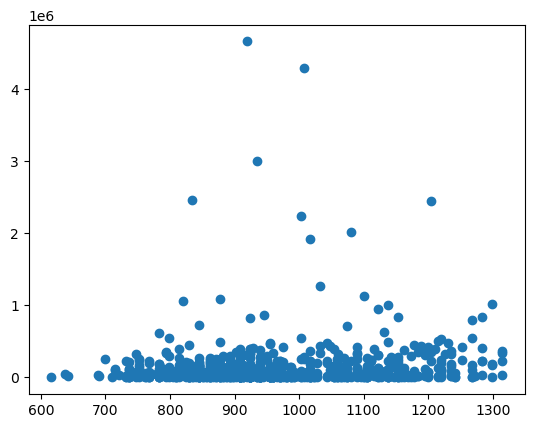

In [26]:
resid12=reg1.resid**2
plt.scatter(fit1,resid12)
plt.show()

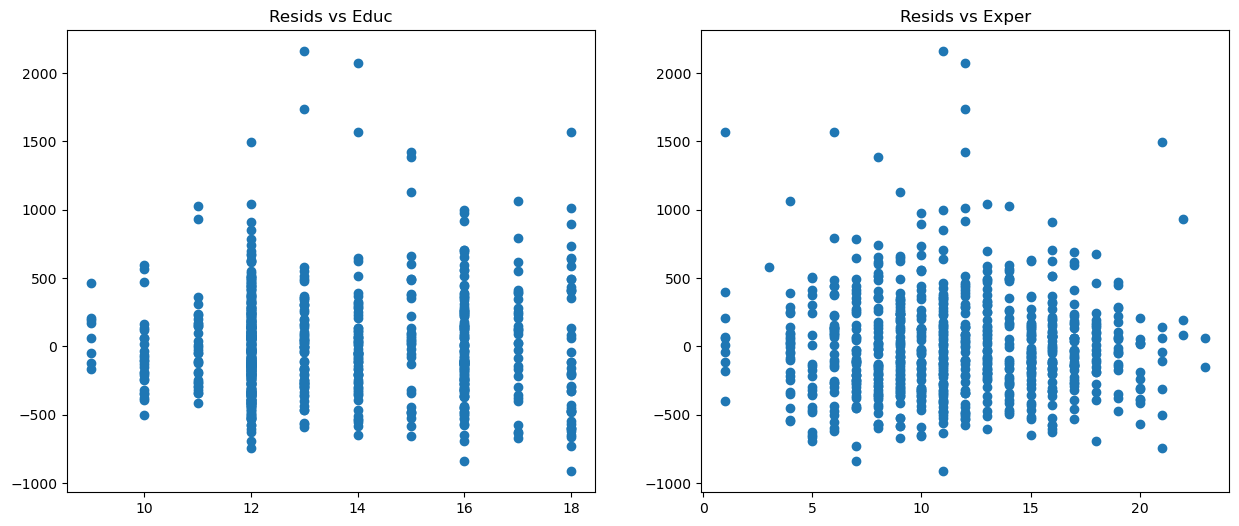

In [28]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(train['educ'],resid1)
ax1.set_title("Resids vs Educ")
ax2.scatter(train['exper'], resid1)
ax2.set_title("Resids vs Exper")
plt.show()

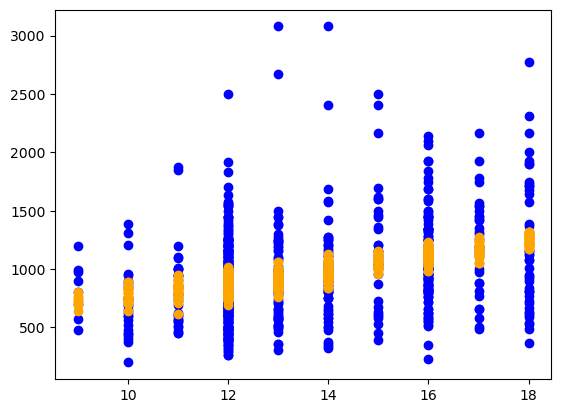

In [30]:
plt.scatter(train['educ'], train['wage'], c='blue')
plt.scatter(train['educ'], fit1, c='orange')
plt.show()

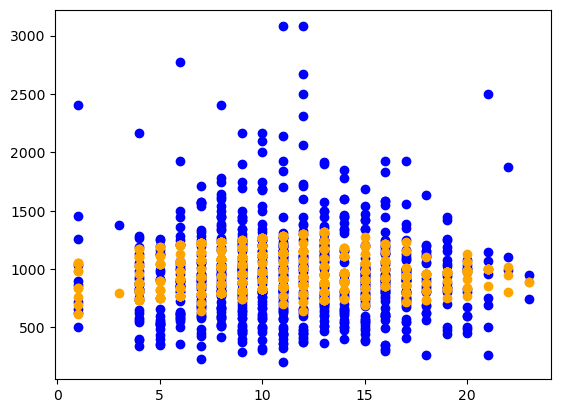

In [32]:
plt.scatter(train['exper'], train['wage'], c='blue')
plt.scatter(train['exper'], fit1, c='orange')
plt.show()

The residuals vs fitted values plot shows no clear pattern in the mean, i.e. the errors seem to average close to 0 for most fitted values, as confirmed by the LOESS curve (apart from a mild dip in the middle). The residuals vs each predictor show that **E**$(e|X) = 0$ appears to hold for most value of $X$. Thus, the linear model seems a reasonable fit for the wage data.

However, there is evidence that the variance of residuals increases slightly for higher fitted values. This is visible in the squared residuals plot, where spread is larger at the extremes. Hence, the assumption of constant variance may not hold, and inference may benefit from using heteroskedasticity-robust standard errors.

The scatter plots of wage against each predictor (in blue), overlaid with fitted values (in orange), offer additional insights:

For **education**, the orange predicted values track the increasing trend in wage with rising education, though they tend to underpredict for higher earners.

For **experience**, a similar pattern is observed: predictions follow the general shape of the data but fail to capture some curvature or variance at higher experience levels. These plots suggest that the model captures the main linear trend well, though it might benefit from polynomial or interaction terms for more accuracy. 

Regarding the other MLR LSA:

**LSA 2** requires **E**$(e|X) = 0$. While the resiual plots support this assumption, it may still be violated due to **omitted variable bias**. For instance, IQ and KWW, which show a positive correlation with wage and likely correlate with educ, are not included in this model. This may bias the coefficient estimates for educ.

**LSA 3** assumes that the observations are i.i.d. As we lack temporal or cluster structure in the data, we proceed under this assumption.

**LSA 4** concerns finite $4^{th}$ moments. Variables such as exper, educ and wage are bounded in practice and show no severe outliers, so this assumption is reasonably satisfied. 

**LSA 5** (no perfect multicollinearity): educ and exper and only moderately correlated (~0.55), which is well below the threshold for concern. Hence, no multicollinearity issues are detected. 

In [46]:
train[['urban','KWW','married','educ','exper']].corr()

urban       KWW   married      educ     exper     hours
urban    1.000000  0.105897 -0.020807  0.088428 -0.052284  0.000753
KWW      0.105897  1.000000  0.087754  0.383803  0.006166  0.122116
married -0.020807  0.087754  1.000000 -0.058639  0.077741  0.044942
educ     0.088428  0.383803 -0.058639  1.000000 -0.460066  0.103829
exper   -0.052284  0.006166  0.077741 -0.460066  1.000000 -0.063650
hours    0.000753  0.122116  0.044942  0.103829 -0.063650  1.000000

The variable KWW appears to be a likely determinant of an individual's wage. In addition, KWW has a moderate positive correlation with education ($r = 0.38$). This is intuitive, as individuals with higher levels of education are likely to score higher on knowledge-based assessments. Since KWW is both statistically significant in explaining wage ($p = 0.006$) and correlated with an included variable in the reduced model, its omission may be causing OVB to the education coefficient. I therefore add KWW to build a three variable MLR.

As a side note, the variables urban and married are also statistically significant ($p < 0.001$), and may explain wage differences due to regional wage premiums and household dynamics. However, they have relatively weak correlations with both educ and exper ($r < 0.09$), suggesting that their omission is less likely to introduce major bias in the current reduced model. 

In [51]:
model2 = smf.ols(formula='wage ~ KWW + educ + exper', data=train)
reg2 = model2.fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     44.80
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           1.40e-26
Time:                        19:05:38   Log-Likelihood:                -5382.2
No. Observations:                 733   AIC:                         1.077e+04
Df Residuals:                     729   BIC:                         1.079e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -298.6483    122.340     -2.441      0.015    -538.830     -58.467
KWW           11.1053      2.049      5.419      0.000       7.082      15.128
educ          54.2331      7.903      6.862      0.000      38.718      69.749
exper         11.3239      3.605      3.141      0.002       4.246      18.402
==============================================================================
Omnibus:                      182.860   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.629
Skew:                           1.166   Prob(JB):                    4.64e-135
Kurtosis:                       6.850   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The original reduced MLR was esimated as: $\hat{Wage} = -201.45 + 72.88 \times \mbox{educ} + 15.68 \times \mbox{exper}$. 95% confidence intervals for the two slopes are: $(58.65, 87.12)$ and $(8.65,22.71)$.

The new MLR is estimated as: $\hat{Wage} = -298.65 + 11.11 \times \mbox{KWW} + 54.23 \times \mbox{educ} + 11.32 \times \mbox{exper} $. 95% confidence intervals for the three slopes are: $(7.08,15.13), (38.72,69.75)$ and $(4.25,18.40)$.

The estimated effect of educ in the three variable MLR has dropped to be lower than the 95% CI from the two-variable MLR. Clearly, KWW was causing some OVB in this estimated effect in the two variable MLR.

The estimated effect of exper has become more negative, however the two 95% CIs have a large overlap and the difference in estimate here can probably be put down to simply estimation error, rather than OVB. In other words, though KWW could have caused some OVB in the two variable MLR for educ, the large standard error on this effect makes it difficult to assess the level of OVB caused, or even if any was apparent.

In [54]:
resid2=reg2.resid
fit2=reg2.fittedvalues
reg2.mse_resid ** 0.5

374.8375719575603

In [59]:
train[['KWW','educ','exper']].corr()

KWW      educ     exper
KWW    1.000000  0.383803  0.006166
educ   0.383803  1.000000 -0.460066
exper  0.006166 -0.460066  1.000000

The variance inflation can be measured by the $R^2$ in the regression of one regressor on the other. Both equal to $\frac{1}{1-r^2}$, where $r$ is the correlation between two variables, as calculated above, equal around 1. This is not a large number -- the usual threshold for the presence of a multicollinearity problem is 5.

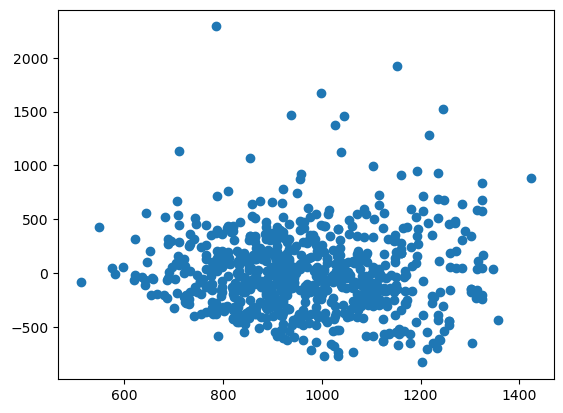

In [56]:
plt.scatter(fit2,resid2)
plt.show()

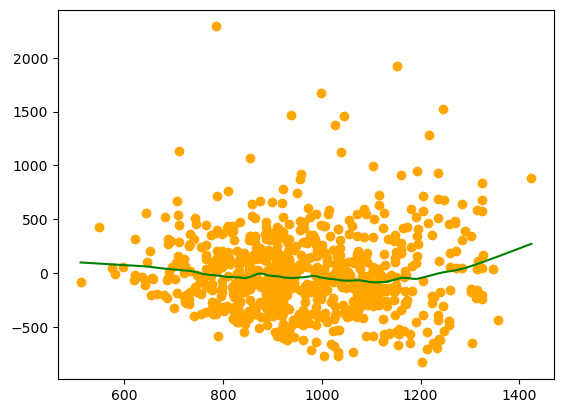

In [71]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
plt.scatter(fit2,resid2, color='orange')
z2 = lowess(resid2, fit2, frac=1./5)
plt.plot(z2[:,0],z2[:,1],'green')
plt.show()

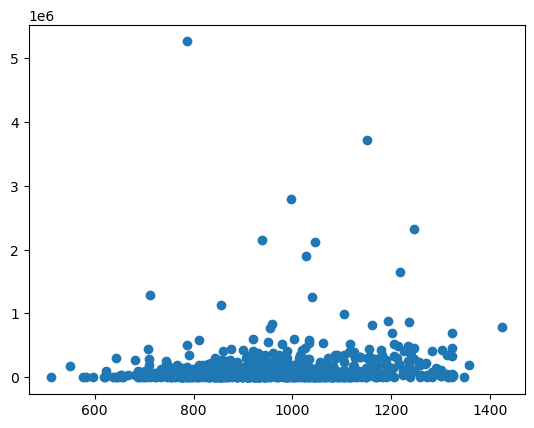

In [73]:
resid122=reg2.resid**2
plt.scatter(fit2,resid122)
plt.show()

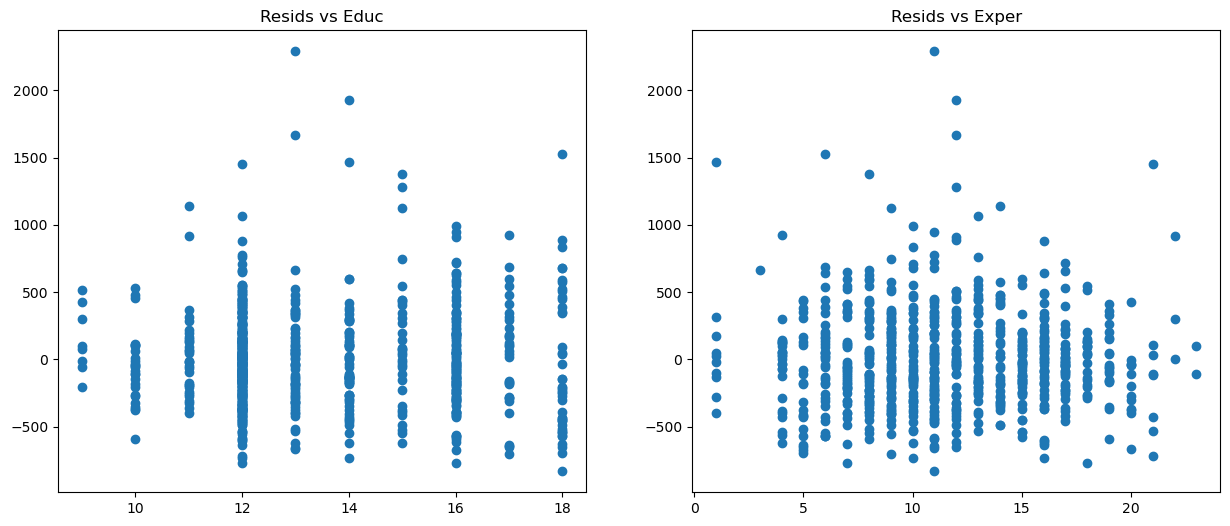

In [79]:
fig = plt.figure(figsize=(15,6))
ax12 = fig.add_subplot(1,2,1)
ax22 = fig.add_subplot(1,2,2)
ax12.scatter(train['educ'],resid2)
ax12.set_title("Resids vs Educ")
ax22.scatter(train['exper'], resid2)
ax22.set_title("Resids vs Exper")
plt.show()

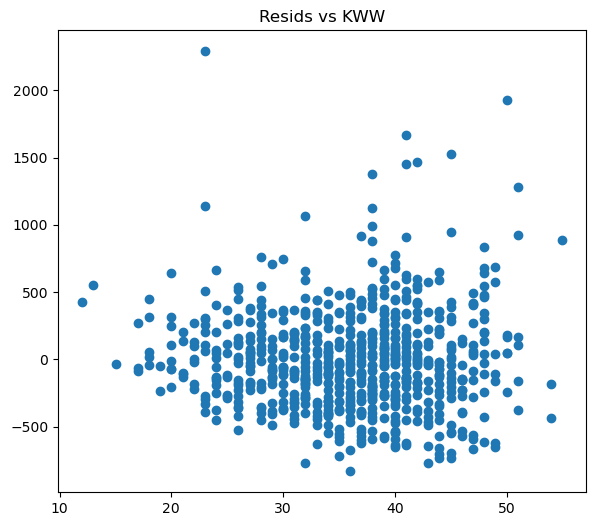

In [83]:
fig = plt.figure(figsize=(15,6))
ax3 = fig.add_subplot(1,2,1)
ax3.scatter(train['KWW'], resid2)
ax3.set_title("Resids vs KWW")
plt.show()

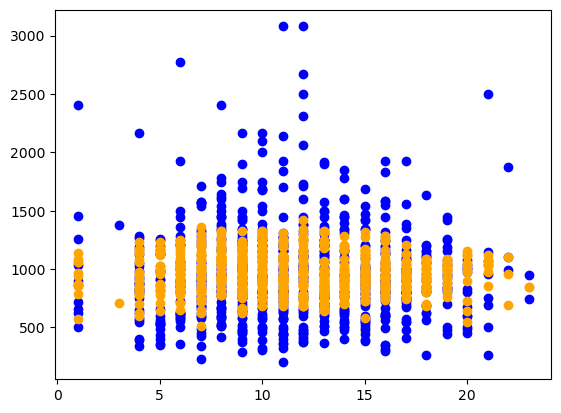

In [85]:
plt.scatter(train['exper'], train['wage'], c='blue')
plt.scatter(train['exper'], fit2, c='orange')
plt.show()

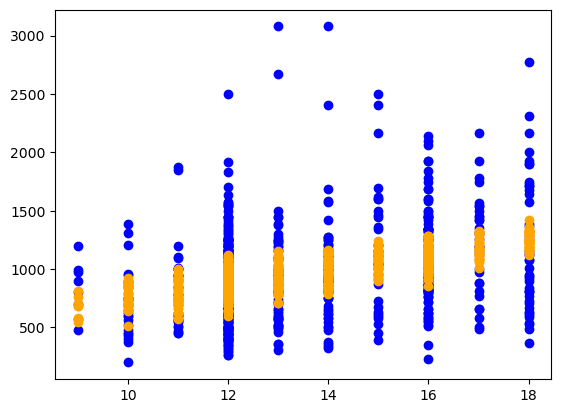

In [87]:
plt.scatter(train['educ'], train['wage'], c='blue')
plt.scatter(train['educ'], fit2, c='orange')
plt.show()

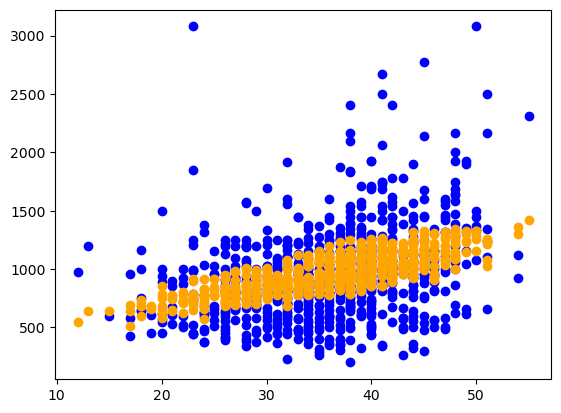

In [89]:
plt.scatter(train['KWW'], train['wage'], c='blue')
plt.scatter(train['KWW'], fit2, c='orange')
plt.show()

The variable KWW is likely a determinant of wage, and is moderately correlated with educ. This makes sense: individuals with higher education levels tend to be more informed about the labor market. Since KWW was omitted in the previous model, it may have been causing OVB to the education coefficient. We now add it to construct a three variable MLR with KWW, educ and exper.

After including KWW, the residual vs fitted values plot shows that the errors are still centered around zero for most fitted values, and no strong non-linear pattern is observed. However, the variance of the residuals increases slightly with fitted values, suggesting heteroskedasticity. This is confirmed by the plot of squared residuals, which displays increasing spread. Therefore, a constant variance assumption may not be suitable, and robust standard errors should be used. 

The residuals vs each predictor show no strong patterns in the mean. In particular, residuals against KWW appear well-behaved. There is no evidence of non-linearity, though a slight U-shape in the lOWESS curve suggests that adding higher-order terms might improve the fit further. 

Regarding the other LSAs:

**LSA 2 E**$(\varepsilon | X)$ = 0 appears more likely to hold after including KWW, as the residuals show no systematic trend with any included predictor. 

**LSA 3** assumes i.i.d. data. We continue to assume this holds, as there is no time or group strcuture in the data.

**LSA 4** is about finite $4^{th}$ moments. All variables are bounded and show no extreme outliers in the plots; this assumption seems satisfied.

**LSA 5** requires no perfect multicollinearity. While KWW and educ are moderately correlated $(r = 0.38)$, this is well below any problematic level. Hence, multicollinearity does not appear to be a concern. 